## Reddit API Authentication

In [1]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="DcyXG2z-Ud3hSjn9xeAqrg",
    client_secret="h9BdnESVlkGpi33zxqdtnJPZ1qhS6A",
    user_agent=user_agent
)

In [2]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

## New rising topics on selected word

In [3]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("Inflation").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Price Change Discussion Thread 2024 Week 07
1aovw2n
AutoModerator
1707729010.0
4
1.0
https://www.reddit.com/r/inflation/comments/1aovw2n/price_change_discussion_thread_2024_week_07/
0


## Selecting headlines of subreddits on selected topic 

In [5]:
headlines = set()
for submission in reddit.subreddit("Inflation").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

978


## Creating dataset

In [6]:
#Create a dataframe from the scrapped data 
df = pd.DataFrame(headlines)
df.head()

,0
0,"Falling inflation, rising growth give U.S. the..."
1,Man this Inflation stuff is crazy
2,"Since President Biden took office, these polic..."
3,Boycott ice cream shops until they lower their...
4,"Olive Oil, Cocoa, and Sugar are making multi-d..."


In [7]:
df.columns

RangeIndex(start=0, stop=1, step=1)

In [8]:
df.columns = ['Titles']

In [10]:
df.head()

,Titles
0,"Falling inflation, rising growth give U.S. the..."
1,Man this Inflation stuff is crazy
2,"Since President Biden took office, these polic..."
3,Boycott ice cream shops until they lower their...
4,"Olive Oil, Cocoa, and Sugar are making multi-d..."


In [11]:
df.Titles.duplicated().sum() 

0

## Cleaning headlines

In [12]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
df["Titles"]= df["Titles"].apply(cleanTxt)



In [13]:
#Show the cleandf.head()
df.head()

,Titles
0,"Falling inflation, rising growth give U.S. the..."
1,Man this Inflation stuff is crazy
2,"Since President Biden took office, these polic..."
3,Boycott ice cream shops until they lower their...
4,"Olive Oil, Cocoa, and Sugar are making multi-d..."


In [14]:

#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
df["Titles"]= df["Titles"].apply(remove_emoji)

#Show the clean text
df.head()

,Titles
0,"Falling inflation, rising growth give U.S. the..."
1,Man this Inflation stuff is crazy
2,"Since President Biden took office, these polic..."
3,Boycott ice cream shops until they lower their...
4,"Olive Oil, Cocoa, and Sugar are making multi-d..."


In [15]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

## Getting polarity and Insight

In [16]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
df['Subjectivity'] = df['Titles'].apply(getSubjectivity)
df['Polarity'] = df['Titles'].apply(getPolarity)

#Now display data
df.head()

,Titles,Subjectivity,Polarity
0,"Falling inflation, rising growth give U.S. the...",0.30000,1.0000
1,Man this Inflation stuff is crazy,0.90000,-0.6000
2,"Since President Biden took office, these polic...",0.44375,-0.1625
3,Boycott ice cream shops until they lower their...,0.00000,0.0000
4,"Olive Oil, Cocoa, and Sugar are making multi-d...",0.00000,0.0000


In [17]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
df["Insight"] = df["Polarity"].apply(getInsight)

df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,"Falling inflation, rising growth give U.S. the...",0.300000,1.000000,Positive
1,Man this Inflation stuff is crazy,0.900000,-0.600000,Negative
2,"Since President Biden took office, these polic...",0.443750,-0.162500,Negative
3,Boycott ice cream shops until they lower their...,0.000000,0.000000,Neutral
4,"Olive Oil, Cocoa, and Sugar are making multi-d...",0.000000,0.000000,Neutral
5,Fox's Doocy SHOCKED by KJP's Shameless Spin on...,0.800000,-0.700000,Negative
6,Jamie Dimon warns the weakness in banking rais...,0.000000,0.000000,Neutral
7,Inflation 010,0.000000,0.000000,Neutral
8,Inevitable inflation.,1.000000,0.000000,Neutral
9,This document gives us a clue into when the ne...,0.250000,0.031250,Positive


## Visualizing sentiment score

In [18]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

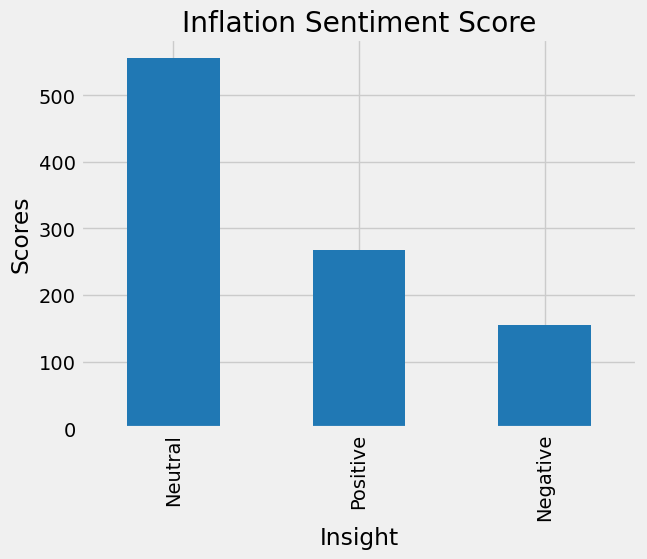

In [20]:
#Plot the values count of sentiment
plt.title("Inflation Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

## Creating WordCloud

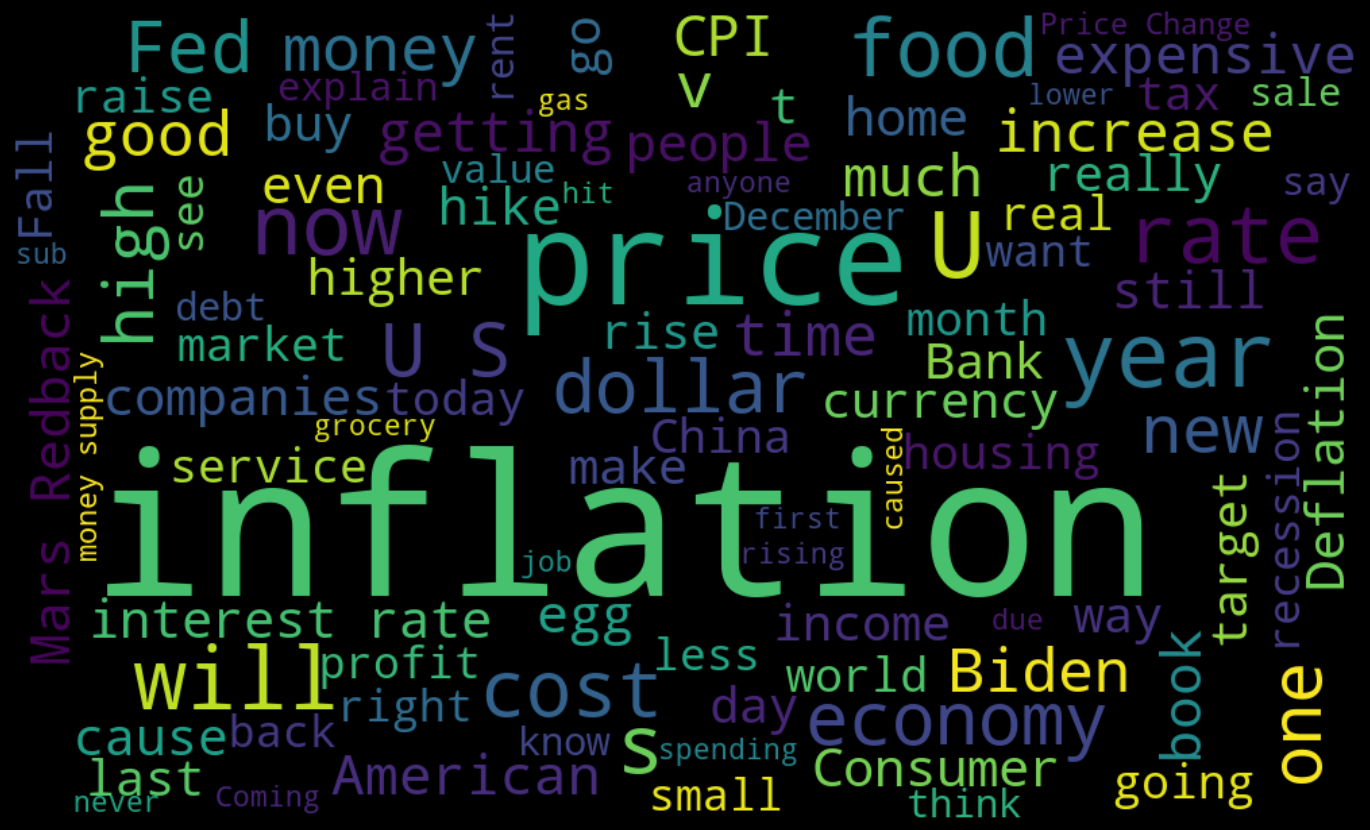

In [21]:
text = ' '.join( [twts for twts in df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");
